In [1]:
%load_ext rpy2.ipython

# 1 - Effect of calibration on usual methods (250 data sets, 209 real-world, 41 synthetic)

In [2]:
%%R

## ---------------------------------------------------------------------------------------------
utils::install.packages(c("astsa",
 "datasets",
 "expsmooth",
 "fma",
 "forecast",
 "fpp",
 "fpp2",
 "MASS",
 "remotes",
 "skimr",
 "tswge"))
remotes::install_github("thierrymoudiki/simulatetimeseries")
remotes::install_github("thierrymoudiki/AdaptiveConformal")
remotes::install_github("Techtonique/ahead")

(as ‘lib’ is unspecified)
































































































































































































































	‘/tmp/RtmpOCfVBV/downloaded_packages’




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpOCfVBV/remotes1a9a2ecb5f/thierrymoudiki-simulatetimeseries-446a6c4/DESCRIPTION’ ... OK
* preparing ‘simulatetimeseries’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘simulatetimeseries_0.1.0.tar.gz’



(as ‘lib’ is unspecified)




These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

 1: All                                 
 2: CRAN packages only                  
 3: None                                
 4: munsell    (0.5.0  -> 0.5.1 ) [CRAN]
 5: sass       (0.4.8  -> 0.4.9 ) [CRAN]
 6: tinytex    (0.49   -> 0.50  ) [CRAN]
 7: bslib      (0.6.1  -> 0.7.0 ) [CRAN]
 8: xfun       (0.41   -> 0.43  ) [CRAN]
 9: highr      (0.9    -> 0.10  ) [CRAN]
10: digest     (0.6.34 -> 0.6.35) [CRAN]
11: rmarkdown  (2.25   -> 2.26  ) [CRAN]
12: htmltools  (0.5.7  -> 0.5.8 ) [CRAN]
13: data.table (1.15.0 -> 1.15.4) [CRAN]
14: isoband    (0.2.6  -> 0.2.7 ) [CRAN]
15: ggplot2    (3.4.4  -> 3.5.0 ) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 1
munsell     (0.5.0  -> 0.5.1     ) [CRAN]
rbibutils   (NA     -> 2.2.16    ) [CRAN]
numDeriv    (NA     -> 2016.8-1.1) [CRAN]
sass        (0.4.8  -> 0.4.9     ) [CRAN]
tinytex     (0.49   -> 0.50


(as ‘lib’ is unspecified)






































































































	‘/tmp/RtmpOCfVBV/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpOCfVBV/remotes1a9148efb8f/thierrymoudiki-AdaptiveConformal-ebfe169/DESCRIPTION’ ... OK
* preparing ‘AdaptiveConformal’:
* checking DESCRIPTION meta-information ... OK
* installing the package to process help pages
Loading required namespace: AdaptiveConformal
* saving partial Rd database
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘AdaptiveConformal_0.1.0.tar.gz’



(as ‘lib’ is unspecified)



(as ‘lib’ is unspecified)







	‘/tmp/RtmpOCfVBV/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpOCfVBV/remotes1a91a7eb295/Techtonique-ahead-787af80/DESCRIPTION’ ... OK
* preparing ‘ahead’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
'
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ahead_0.12.1.tar.gz’



(as ‘lib’ is unspecified)



  method            from
  as.zoo.data.frame zoo 

  Want to stay up-to-date? Read the Hyndsight blog:
  https://robjhyndman.com/hyndsight/


✔ fma       2.5       




Attaching package: ‘simulatetimeseries’



    removenas



Attaching package: ‘astsa’



    chicken, sales



    oil



    gas





Attaching package: ‘zoo’



    as.Date, as.Date.numeric



    ‘tseries’ version: 0.10-55

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.


Attaching package: ‘fpp’



    oil



    ausair, ausbeer, austa, austourists, debitcards, departures,
    elecequip, euretail, guinearice, oil, sunspotarea, usmelec



Attaching package: ‘MASS’



    cement, housing, petrol



Attaching package: ‘tswge’



    cement



    wages



    flu



    freight



    cement



    uspop


(as ‘lib’ is unspecified)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpOCfVBV/downloaded_packages’

(as ‘lib’ is unspecified)







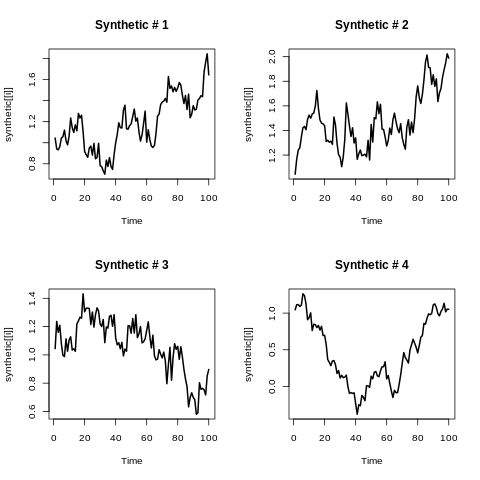

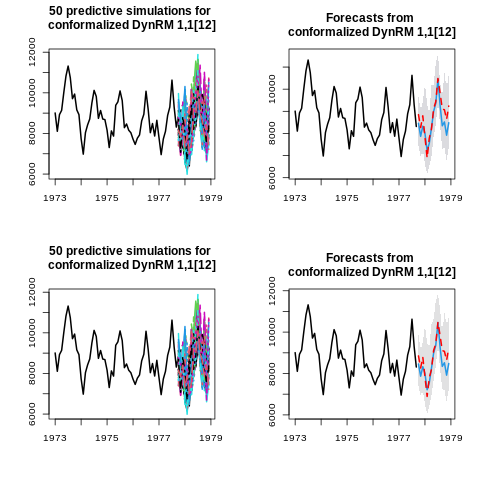

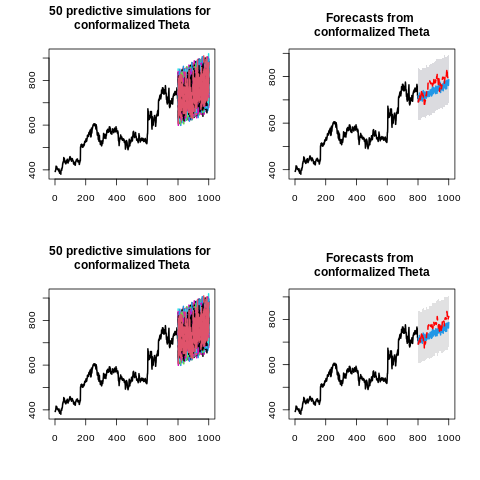

In [3]:
%%R

## ----echo=FALSE, cache=FALSE, message=FALSE, warning=FALSE, fig.cap="4 synthetic data sets (among 47)"----
suppressWarnings(library(datasets))
suppressWarnings(library(forecast))
suppressWarnings(library(fpp2))
suppressWarnings(library(skimr))
suppressWarnings(library(ahead))
suppressWarnings(library(simulatetimeseries))

n_synthetic <- 4
synthetic <- vector("list", n_synthetic)
for (j in 1:n_synthetic)
{
 set.seed(123+j*100)
  xi <- rnorm(100, mean = 0, sd = sqrt(0.01))
  eps <- rep(0, 100)
  for (i in 2:100) {
    eps[i] <- 0.99 * eps[i - 1] + xi[i]
  }
  trend <- seq_along(100)
  season_term <- 2 * pi * trend / 180
  synthetic[[j]] <- ts(cos(season_term) + sin(season_term) + 0.01 * trend + eps)
}

par(mfrow=c(2, 2))
for (i in 1:4)
  plot(synthetic[[i]], lwd=2, main=paste("Synthetic #", i))


## ----echo=FALSE, cache=FALSE, warning=FALSE, message=FALSE------------------------------------
library(datasets)
B <- 50L
fit_obj_95_1 <- ahead::fitforecast(USAccDeaths, conformalize = TRUE, pct_train = 0.8, pct_calibration=0.5, method = "dynrmf", type_sim = "kde", vol="constant", B=B, level=95L)
fit_obj_99_1 <- ahead::fitforecast(USAccDeaths, conformalize = TRUE, pct_train = 0.8, pct_calibration=0.5, method = "dynrmf", type_sim = "kde", vol="constant", B=B, level=99L)


## ----echo=FALSE, cache=FALSE, fig.alt='USAccDeaths', fig.cap="50 predictive simulations for USAccDeaths (95% coverage and 99% coverage)"----
par(mfrow=c(2, 2))
fit_obj_95_1$plot(type="simulations")
fit_obj_95_1$plot(type="forecast")
fit_obj_99_1$plot(type="simulations")
fit_obj_99_1$plot(type="forecast")


## ----echo=FALSE, cache=FALSE, warning=FALSE, message=FALSE------------------------------------
library(datasets)
B <- 50L
fit_obj_95_2 <- ahead::fitforecast(fpp2::goog, conformalize = 1, pct_train = 0.8, pct_calibration=0.5, method = "thetaf", type_sim = "kde", vol="constant", B=B, level=95L)
fit_obj_99_2 <- ahead::fitforecast(fpp2::goog, conformalize = 1, pct_train = 0.8, pct_calibration=0.5, method = "thetaf", type_sim = "kde", vol="constant", B=B, level=99L)


## ----echo=FALSE, cache=FALSE, fig.alt='GOOG', fig.cap="50 predictive simulations for GOOG stock (95% and 99% coverage)"----
par(mfrow=c(2, 2))
fit_obj_95_2$plot(type="simulations")
fit_obj_95_2$plot(type="forecast")
fit_obj_99_2$plot(type="simulations")
fit_obj_99_2$plot(type="forecast")


## ----cache=TRUE, echo=FALSE, message=FALSE, warning=FALSE-------------------------------------
all_datasets <- simulatetimeseries::get_data_1()


## ----echo=FALSE, cache=FALSE, message=FALSE, warning=FALSE------------------------------------
row_names <- names(all_datasets)

col_names <- c("thetaf_0", "dynrmf_0",
               "thetaf_kde", "dynrmf_kde",
               "thetaf_boot", "dynrmf_boot",
               "thetaf_surr", "dynrmf_surr")

n_datasets <- length(all_datasets)
n_methods <- length(col_names)
results_winkler_score <- results_coverage_rate <- matrix(0, nrow=n_datasets, ncol=n_methods)

rownames(results_winkler_score) <- row_names
colnames(results_winkler_score) <- col_names
rownames(results_coverage_rate) <- row_names
colnames(results_coverage_rate) <- col_names

results_winkler_score <- as.data.frame(results_winkler_score)
results_coverage_rate <- as.data.frame(results_coverage_rate)


## ----echo=FALSE, cache=FALSE------------------------------------------------------------------
params <- vector("list", n_methods)
names(params) <- col_names

level <- 95
pct_train <- 0.9
pct_calibration <- 0.5


## ----cache=TRUE, message=FALSE, warning=FALSE, echo=FALSE, eval=TRUE--------------------------
install.packages("doSNOW")
install.packages("foreach")
install.packages("forecast")
install.packages("snow")
types_sim <- c("kde", "boot", "surr")

library("doSNOW")
library("foreach")
library("parallel")
library("snow")



In [4]:
%%R

cl_SOCK <- parallel::makeCluster(parallel::detectCores(),
                                 type = "SOCK")
doSNOW::registerDoSNOW(cl_SOCK)
`%op%` <-  foreach::`%dopar%`


In [5]:
%%R

pb <- txtProgressBar(min = 0,
                      max = n_datasets,
                      style = 3)
progress <- function(n)
  utils::setTxtProgressBar(pb, n)
opts <- list(progress = progress)

idx_dataset <- NULL
res <- foreach::foreach(
  idx_dataset = 1:n_datasets,
  .packages = c("ahead", "forecast"),
  #.combine = rbind,
  .errorhandling = "stop",
  .options.snow = opts,
  .verbose = FALSE
) %do% {

  selected_data <- all_datasets[[idx_dataset]]
  # no conformalization
  fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 0, pct_train = pct_train,
                          pct_calibration=pct_calibration,
                          method = "dynrmf"), silent = TRUE)
  if (!inherits(fit_obj, "try-error"))
  {
  results_winkler_score[, "dynrmf_0"][idx_dataset] <- fit_obj$winkler_score
  results_coverage_rate[, "dynrmf_0"][idx_dataset] <- fit_obj$coverage
  } else {
    results_winkler_score[, "dynrmf_0"][idx_dataset] <- NA
    results_coverage_rate[, "dynrmf_0"][idx_dataset] <- NA
  }

  fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 0, pct_train = pct_train,
                          pct_calibration=pct_calibration,
                          method = "thetaf"), silent = TRUE)
  if (!inherits(fit_obj, "try-error"))
  {
  results_winkler_score[, "thetaf_0"][idx_dataset] <- fit_obj$winkler_score
  results_coverage_rate[, "thetaf_0"][idx_dataset] <- fit_obj$coverage
  } else {
    results_winkler_score[, "thetaf_0"][idx_dataset] <- NA
    results_coverage_rate[, "thetaf_0"][idx_dataset] <- NA
  }

  # conformalization
  for (type_sim in types_sim){
    fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 1,
                            pct_train = pct_train,
                            pct_calibration=pct_calibration,
                            method = "dynrmf", type_sim = type_sim), silent = TRUE)
    if (!inherits(fit_obj, "try-error"))
  {
    results_winkler_score[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- fit_obj$winkler_score
    results_coverage_rate[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- fit_obj$coverage #abs(fit_obj$coverage/level - 1)*100
    } else {
      results_winkler_score[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- NA
      results_coverage_rate[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- NA
    }

    fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 1,
                            pct_train = pct_train,
                            pct_calibration=pct_calibration,
                            method = "thetaf", type_sim = type_sim), silent = TRUE)
    if (!inherits(fit_obj, "try-error"))
  {
    results_winkler_score[, paste0('thetaf', '_', type_sim)][idx_dataset] <- fit_obj$winkler_score
    results_coverage_rate[, paste0('thetaf', '_', type_sim)][idx_dataset] <- fit_obj$coverage #abs(fit_obj$coverage/level - 1)*100
    } else {
    results_winkler_score[, paste0('thetaf', '_', type_sim)][idx_dataset] <- NA
    results_coverage_rate[, paste0('thetaf', '_', type_sim)][idx_dataset] <- NA
  }

    }
}

saveRDS(object = results_winkler_score, file = "results_winkler_score.rds")
saveRDS(object = results_coverage_rate, file = "results_coverage_rate.rds")

  |                                                                      |   0%

In [6]:
%R print(summary(results_coverage_rate))

    thetaf_0         dynrmf_0        thetaf_kde       dynrmf_kde    
 Min.   :  0.00   Min.   :  0.00   Min.   : 15.79   Min.   :  0.00  
 1st Qu.: 90.00   1st Qu.: 80.58   1st Qu.: 85.71   1st Qu.: 91.67  
 Median :100.00   Median : 93.57   Median :100.00   Median :100.00  
 Mean   : 88.83   Mean   : 87.70   Mean   : 88.23   Mean   : 93.77  
 3rd Qu.:100.00   3rd Qu.:100.00   3rd Qu.:100.00   3rd Qu.:100.00  
 Max.   :100.00   Max.   :100.00   Max.   :100.00   Max.   :100.00  
 NA's   :9        NA's   :2        NA's   :13       NA's   :3       
  thetaf_boot      dynrmf_boot      thetaf_surr      dynrmf_surr    
 Min.   :  0.00   Min.   :  0.00   Min.   : 15.62   Min.   :  0.00  
 1st Qu.: 75.00   1st Qu.: 87.50   1st Qu.: 80.00   1st Qu.: 90.00  
 Median : 91.67   Median : 96.58   Median : 92.77   Median : 97.06  
 Mean   : 82.49   Mean   : 89.86   Mean   : 84.89   Mean   : 91.56  
 3rd Qu.:100.00   3rd Qu.:100.00   3rd Qu.:100.00   3rd Qu.:100.00  
 Max.   :100.00   Max.   :100.00  

'Min. :...,'1st Qu.:...,'Median :...,...,'3rd Qu.:...,'Max. :...,"""NA's :..."


In [12]:
%%R

confint_coverage_rate <- round(t(apply(results_coverage_rate, 2, function(x) t.test(x)$conf.int)), 2L)
colnames(confint_coverage_rate) <- c("lower", "upper")
confint_coverage_rate <- as.data.frame(confint_coverage_rate)
print(confint_coverage_rate)

            lower upper
thetaf_0    86.38 91.29
dynrmf_0    85.50 89.90
thetaf_kde  85.68 90.77
dynrmf_kde  92.23 95.32
thetaf_boot 79.33 85.64
dynrmf_boot 87.68 92.05
thetaf_surr 82.18 87.60
dynrmf_surr 89.76 93.36


In [7]:
%R print(summary(results_winkler_score))

    thetaf_0          dynrmf_0         thetaf_kde        dynrmf_kde     
 Min.   :      0   Min.   :      0   Min.   :      0   Min.   :      0  
 1st Qu.:      2   1st Qu.:      1   1st Qu.:      1   1st Qu.:      1  
 Median :     31   Median :     21   Median :     35   Median :     24  
 Mean   :  49776   Mean   :  21428   Mean   :  45348   Mean   :  20930  
 3rd Qu.:    354   3rd Qu.:    168   3rd Qu.:    611   3rd Qu.:    192  
 Max.   :3342610   Max.   :3282801   Max.   :6437130   Max.   :3775826  
 NA's   :9         NA's   :2         NA's   :13        NA's   :3        
  thetaf_boot       dynrmf_boot       thetaf_surr       dynrmf_surr     
 Min.   :      0   Min.   :      0   Min.   :      0   Min.   :      0  
 1st Qu.:      2   1st Qu.:      2   1st Qu.:      1   1st Qu.:      1  
 Median :     35   Median :     25   Median :     36   Median :     24  
 Mean   :  48122   Mean   :  22728   Mean   :  48791   Mean   :  22468  
 3rd Qu.:    747   3rd Qu.:    238   3rd Qu.:    73

'Min. :...,'1st Qu.:...,'Median :...,...,'3rd Qu.:...,'Max. :...,"""NA's :..."


# 2 - Comparison with recently published Adaptive conformal methods AgACI and  FACI

See https://arxiv.org/pdf/2312.00448.pdf and https://proceedings.mlr.press/v162/zaffran22a/zaffran22a.pdf for more details

In [8]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R

utils::install.packages(c("forecast",
                          "fpp",
                          "fpp2",
                          "MASS",
                          "remotes"))
remotes::install_github("thierrymoudiki/simulatetimeseries", force=TRUE)
remotes::install_github("thierrymoudiki/AdaptiveConformal")
remotes::install_github("Techtonique/ahead", force=TRUE)



In [10]:
%%R

library("AdaptiveConformal")
library("ahead")
library("simulatetimeseries")
library("foreach")
library("forecast")

B <- 25
params_psi <- params_theta <- c(0.1, 0.8, 0.9, 0.95, 0.99)
levels <- c(80, 90, 95)
fcast_methods <- c("thetaf", "dynrmf")
conformal_methods <- c("splitconformal", "AgACI", "FACI")

(params_grid <- expand.grid(params_psi, params_theta,
                            levels, fcast_methods,
                            conformal_methods))
colnames(params_grid) <- c("psi", "theta",
                           "level",
                           "fcast_method",
                           "conformal_method")
print(dim(params_grid))
params_grid$fcast_method <- as.vector(params_grid$fcast_method)
params_grid$conformal_method <- as.vector(params_grid$conformal_method)

results <- matrix(0, ncol=25, nrow=nrow(params_grid))
colnames(results) <- paste0("B", seq_len(B))

params_grid <- cbind.data.frame(params_grid, results)

nb_iter <- nrow(params_grid)

pb <- txtProgressBar(min = 0,
                     max = nb_iter,
                     style = 3)

for (i in 1:nrow(params_grid))
{
  for (j in 6:ncol(params_grid))
  {
    seed_i_j <- 100*i+300*j

    y <- simulatetimeseries::simulate_time_series_4(n = 600,
                                                    params_grid$psi[i],
                                                    params_grid$theta[i],
                                                    seed=seed_i_j)
    splitted_ts <- simulatetimeseries::splitts(y = y, split_prob = 0.9)
    y_train <- splitted_ts$training
    y_test <- splitted_ts$testing

    if (as.character(params_grid$conformal_method[i]) == "splitconformal")
    {
      obj <- ahead::fitforecast(y,
                                conformalize = TRUE,
                                pct_train = 0.9,
                                pct_calibration = 0.5,
                                method = as.character(params_grid$fcast_method[i]),
                                type_calibration = "splitconformal",
                                level = params_grid$level[i],
                                type_sim = "kde",
                                graph = FALSE
      )
      params_grid[i, j] <- obj$coverage
    }

    if (as.character(params_grid$conformal_method[i]) %in% c("AgACI", "FACI"))
    {
      preds <- switch(as.character(params_grid$fcast_method[i]),
                      thetaf = forecast::thetaf(y_train, h=length(y_test))$mean,
                      dynrmf = ahead::dynrmf(y_train, h=length(y_test))$mean)
      result <- AdaptiveConformal::aci(as.vector(y_test),
                                       as.vector(preds),
                                       method = as.character(params_grid$conformal_method[i]),
                                       alpha = params_grid$level[i]/100)
      params_grid[i, j] <- result$metrics$coverage*100
    }
  }
  utils::setTxtProgressBar(pb, i)
}
#parallel::stopCluster(cl_SOCK)
close(pb)

saveRDS(params_grid, "params_grid.rds")

[1] 450   5
  |======================================================================| 100%


In [11]:
%%R

print(summary(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="dynrmf" & level==95))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="dynrmf" & level==95))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="thetaf" & level==95))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="thetaf" & level==95))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="dynrmf" & level==95))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="thetaf" & level==95))[,6:30])))

print(summary(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="dynrmf" & level==90))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="dynrmf" & level==90))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="thetaf" & level==90))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="thetaf" & level==90))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="dynrmf" & level==90))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="thetaf" & level==90))[,6:30])))


print(summary(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="dynrmf" & level==80))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="dynrmf" & level==80))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="thetaf" & level==80))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="thetaf" & level==80))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="dynrmf" & level==80))[,6:30])))
print(summary(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="thetaf" & level==80))[,6:30])))


print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="dynrmf" & level==95))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="dynrmf" & level==95))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="thetaf" & level==95))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="thetaf" & level==95))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="dynrmf" & level==95))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="thetaf" & level==95))[,6:30]))$conf.int)


print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="dynrmf" & level==90))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="dynrmf" & level==90))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="thetaf" & level==90))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="thetaf" & level==90))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="dynrmf" & level==90))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="thetaf" & level==90))[,6:30]))$conf.int)

print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="dynrmf" & level==80))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="dynrmf" & level==80))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="splitconformal" & fcast_method=="thetaf" & level==80))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="AgACI" & fcast_method=="thetaf" & level==80))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="dynrmf" & level==80))[,6:30]))$conf.int)
print(t.test(rowMeans(base::subset(params_grid, (conformal_method=="FACI" & fcast_method=="thetaf" & level==80))[,6:30]))$conf.int)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  93.80   94.93   95.60   95.48   96.07   97.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  89.13   89.53   89.73   89.89   90.27   91.20 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  91.00   93.67   95.13   94.45   95.40   96.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  88.53   89.20   89.80   89.79   90.20   91.60 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  89.93   90.80   91.13   91.01   91.40   92.40 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  89.87   90.33   90.60   90.60   90.93   91.20 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  89.47   90.67   91.40   91.36   92.33   92.60 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  85.27   85.73   86.27   86.32   86.93   88.33 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  84.87   88.40   90.53   89.73   91.20   92.73 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  85.67   86.00   86.40   86.52   86.80   87.80 
   Min. 1st Qu.  Med